In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D , Activation , MaxPooling2D , Dense , Flatten , Dropout

import numpy as np

# import pandas as pd

import matplotlib.pyplot as plt

import os

import cv2

import random

# from scipy import ndimage

import sys

np.set_printoptions(threshold=sys.maxsize)
# from scipy.misc import imresize
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.metrics.pairwise import cosine_similarity


In [21]:
DataDIR = "D:/flutter course/Signature-Verification_System_using_YOLOv5-and-CycleGAN/Training/VGG16 FE/SignaturesDataset/train"

Categories = ["Genuine" , "Forged"]

Users = list(map(str, list(range(1, 65))))



# print(type(Categories[1]))


In [14]:




def normalize_image(inputImage , standardBackgroundSize , outputImageSize):
    img = inputImage.astype(np.uint8)
    

    max_r, max_c = standardBackgroundSize
    out_r, out_c = outputImageSize
   
    
    blurred_image = cv2.GaussianBlur(img,(5,5),0)


    threshold, binarized_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


    r, c = np.where(binarized_image == 0)
    r_center = int(r.mean() - r.min())
    c_center = int(c.mean() - c.min())


    cropped = img[r.min(): r.max(), c.min(): c.max()]


    img_r, img_c = cropped.shape

    r_start = max_r // 2 - r_center
    c_start = max_c // 2 - c_center


    if img_r > max_r:
        # print ('Warning: cropping image. The signature should be smaller than the canvas size')
        r_start = 0
        difference = img_r - max_r
        crop_start = difference // 2
        cropped = cropped[crop_start:crop_start + max_r, :]
        img_r = max_r
    else:
        extra_r = (r_start + img_r) - max_r
      
        if extra_r > 0:
            r_start -= extra_r
        if r_start < 0:
            r_start = 0

   
    if img_c > max_c:
        # print ('Warning: cropping image. The signature should be smaller than the canvas size')
        c_start = 0
        difference = img_c - max_c
        crop_start = difference // 2
        cropped = cropped[:, crop_start:crop_start + max_c]
        img_c = max_c
    else:
        extra_c = (c_start + img_c) - max_c
        if extra_c > 0:
            c_start -= extra_c
        if c_start < 0:
            c_start = 0

    normalized_image = np.ones((max_r, max_c), dtype=np.uint8) * 255
   
    normalized_image[r_start:r_start + img_r, c_start:c_start + img_c] = cropped


    normalized_image[normalized_image > threshold] = 0

    resized = cv2.resize(normalized_image, (out_r, out_c))

    return resized




            



Preparing the data

In [82]:
x_max , y_max = 0,0
x_min , y_min = 2000,2000


for category in Categories:
    path = os.path.join(DataDIR, category)
    # print(path)
    # break
    for user in Users:
        path2 = os.path.join(path, user)
        for img in os.listdir(path2):
            img_array = cv2.imread(os.path.join(path2,img), cv2.IMREAD_GRAYSCALE)
            x,y = img_array.shape
            
            x_max = x if x > x_max else x_max
            y_max = y if y > y_max else y_max
            x_min = x if x < x_min else x_min
            y_min = y if y < y_min else y_min

            


# plt.imshow(img_array, cmap = "gray")
# plt.show()




print(x_max)
print(y_max)
print(x_min)
print(y_min)

778
1372
83
229


In [83]:
x_max , y_max = 778,1372
x_min , y_min = 83,229


for category in Categories:
    path = os.path.join(DataDIR, category)
    # print(path)
    # break
    for user in Users:
        path2 = os.path.join(path, user)
        for img in os.listdir(path2):
            img_array = cv2.imread(os.path.join(path2,img), cv2.IMREAD_GRAYSCALE)
            x,y = img_array.shape
            
            # x_max = x if x > x_max else x_max
            # y_max = y if y > y_max else y_max
            # x_min = x if x < x_min else x_min
            # y_min = y if y < y_min else y_min

            print("x_max : " , path2) if x == x_max else 0
            print("x_min : " , path2) if x == x_min else 0
            print("y_max : " , path2) if y == y_max else 0
            print("y_min : " , path2) if y == y_min else 0


# plt.imshow(img_array, cmap = "gray")
# plt.show()






y_min :  D:/flutter course/Signature-Verification_System_using_YOLOv5-and-CycleGAN/Training/VGG16 FE/SignaturesDataset/train\Genuine\4
x_max :  D:/flutter course/Signature-Verification_System_using_YOLOv5-and-CycleGAN/Training/VGG16 FE/SignaturesDataset/train\Genuine\62
y_max :  D:/flutter course/Signature-Verification_System_using_YOLOv5-and-CycleGAN/Training/VGG16 FE/SignaturesDataset/train\Genuine\62
x_min :  D:/flutter course/Signature-Verification_System_using_YOLOv5-and-CycleGAN/Training/VGG16 FE/SignaturesDataset/train\Genuine\64


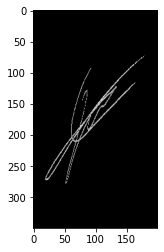

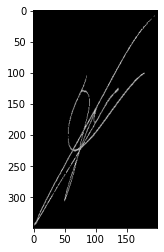

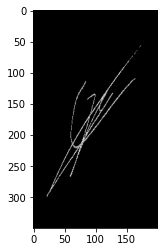

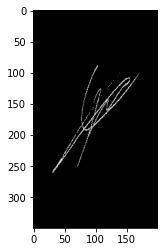

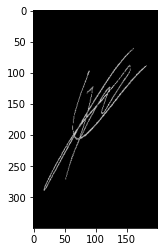

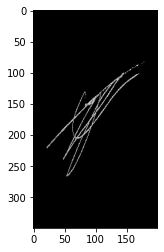

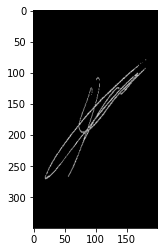

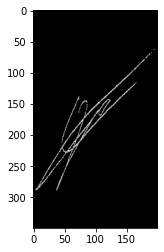

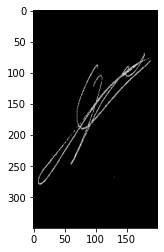

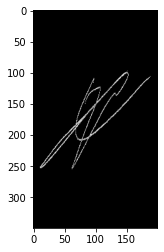

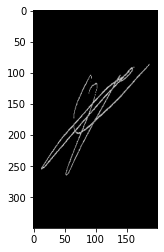

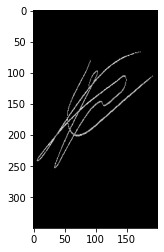

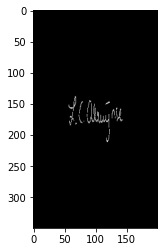

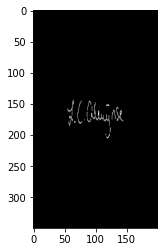

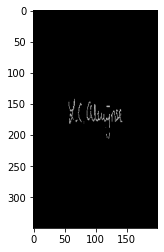

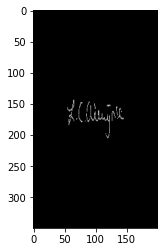

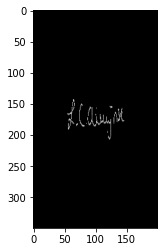

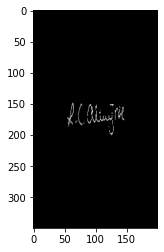

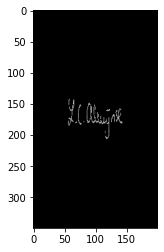

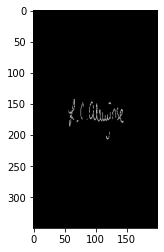

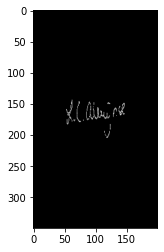

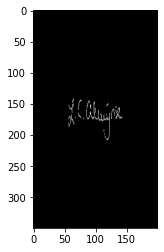

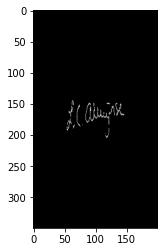

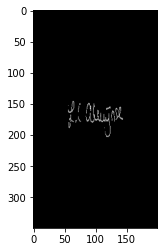

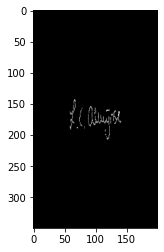

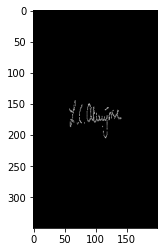

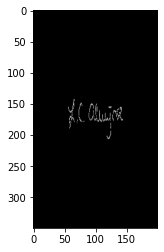

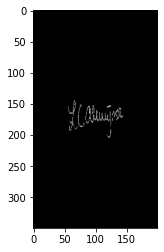

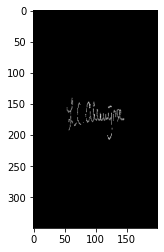

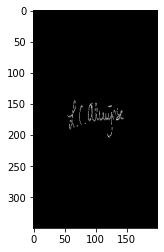

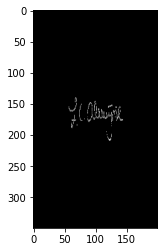

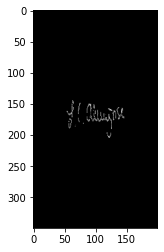

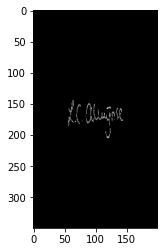

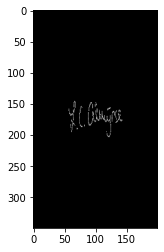

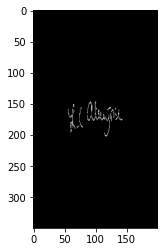

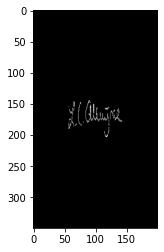

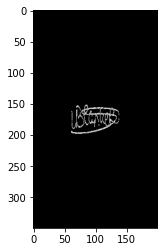

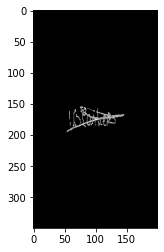

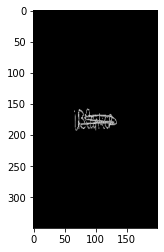

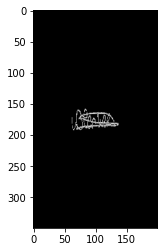

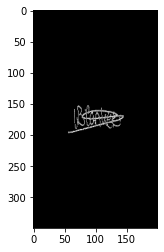

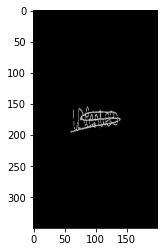

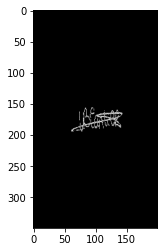

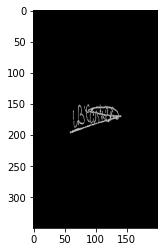

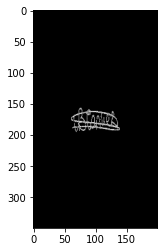

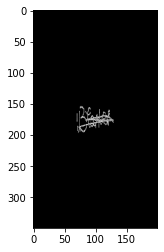

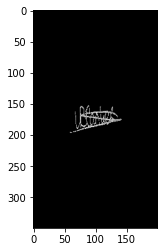

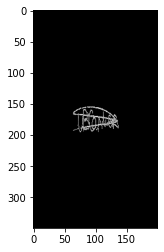

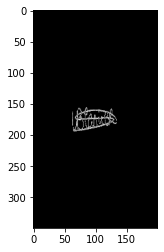

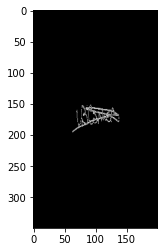

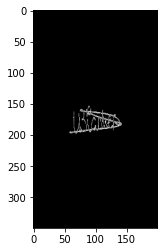

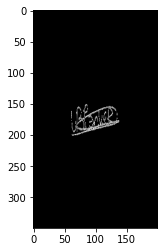

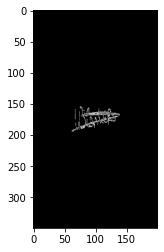

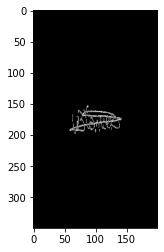

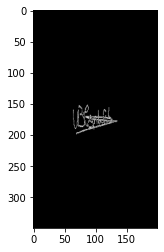

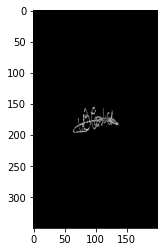

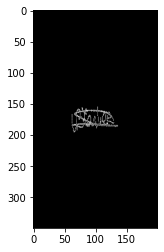

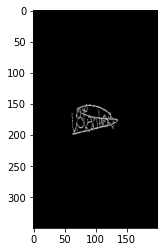

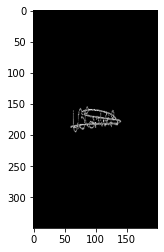

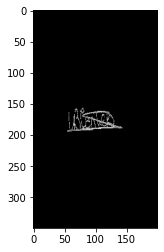

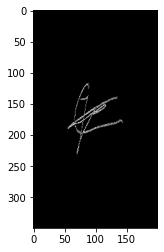

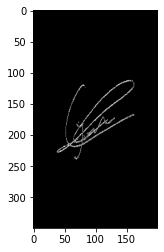

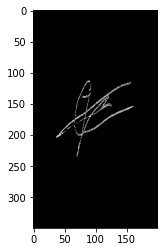

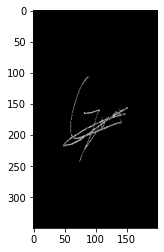

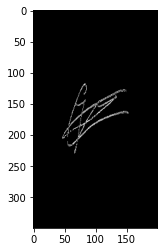

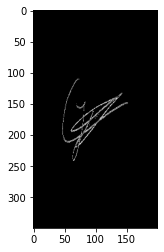

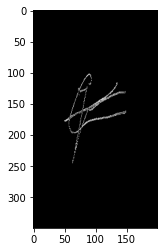

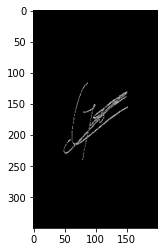

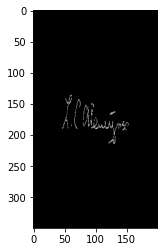

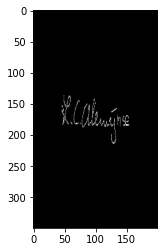

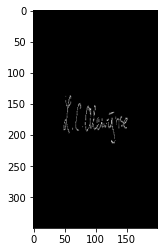

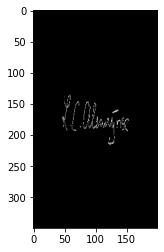

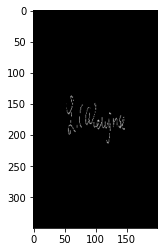

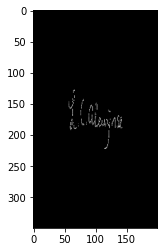

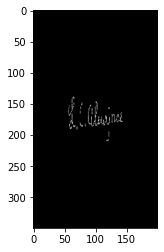

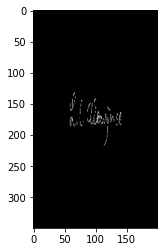

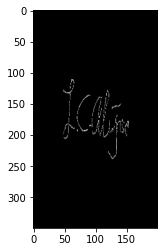

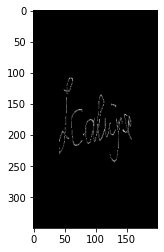

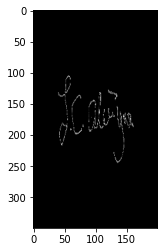

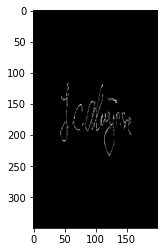

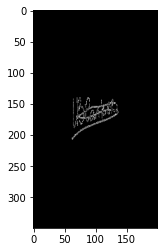

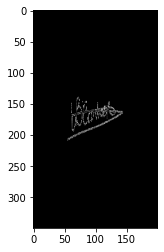

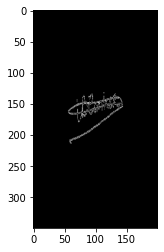

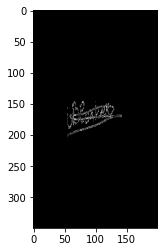

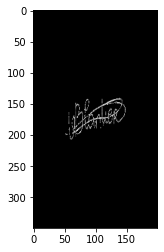

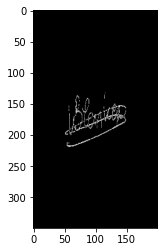

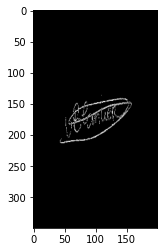

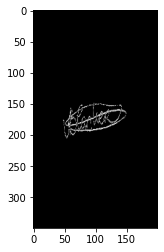

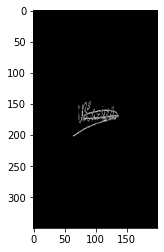

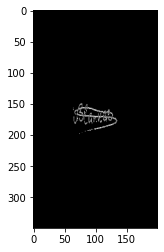

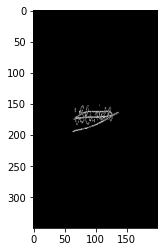

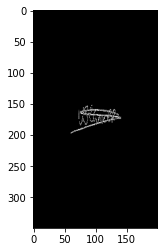

92


In [22]:
training_data = []

resizeW , resizeH = 200 , 350

def create_training_data():
    for category in Categories:
        path = os.path.join(DataDIR, category)
        class_num = Categories.index(category)
        # print(path)
        # break
        for user in Users:
            path2 = os.path.join(path, user)
            for img in os.listdir(path2):
                try:
                    img_array = cv2.imread(os.path.join(path2,img), cv2.IMREAD_GRAYSCALE)
                    testPreprossing = normalize_image(img_array, (800 , 1400), (resizeW , resizeH))
                    training_data.append([testPreprossing , class_num])
                    plt.imshow(testPreprossing, cmap = "gray")
                    plt.show()
                except Exception as e:
                    print('e')
                
                
                # print(testPreprossing)
create_training_data()
random.shuffle(training_data)
print(len(training_data))

In [16]:
print(type(training_data))
# plt.imshow(training_data[23][0], cmap = "gray")
# plt.show()

<class 'list'>


In [17]:
temp = []
label_temp = []

for features, labels in training_data:
    temp.append(features)
    label_temp.append(labels)

npArray = np.array(temp).reshape(-1 , resizeW , resizeH , 1)
label_temp = np.array(label_temp)


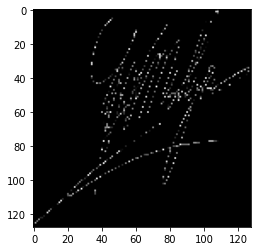

In [67]:
plt.imshow(npArray[77], cmap = "gray")
plt.show()
npArray = npArray / 255.0
# print(npArray)


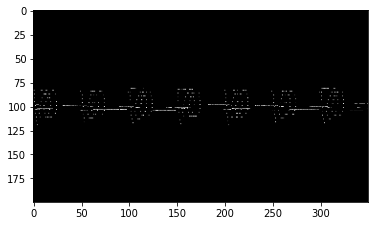

In [18]:
plt.imshow(npArray[77], cmap = "gray")
plt.show()
npArray = npArray / 255.0
# print(npArray)

In [ ]:
model = Sequential()

model.add(Conv2D(32 , (5,5) , activation= 'relu' , input_shape = npArray.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(128 , (3,3) , activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(32 , (3,3) , activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# model.add(Dense(64 , activation= 'relu'))
model.add(Dense(16 , activation= 'relu'))
model.add(Dense(1, activation= 'softmax'))

model.compile(loss='binary_crossentropy' , optimizer = tf.keras.optimizers.Adam(learning_rate=10e-06, beta_1=0.9, beta_2=0.999, 
epsilon=1e-08, decay=0.0001) , metrics = ['accuracy'])

model.fit(npArray , label_temp , batch_size= 32 , validation_split = 0.3 , epochs = 5)